<a href="https://colab.research.google.com/github/kaviarasi20/TSAproject/blob/main/127177011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trend: [   0.            0.            0.         2075.         2283.33333333
 2466.66666667 2683.33333333 2908.33333333 3141.66666667    0.
    0.            0.        ]
Seasonality: [-176.38888889  -34.72222222  211.11111111 -176.38888889  -34.72222222
  211.11111111 -176.38888889  -34.72222222  211.11111111 -176.38888889
  -34.72222222  211.11111111]


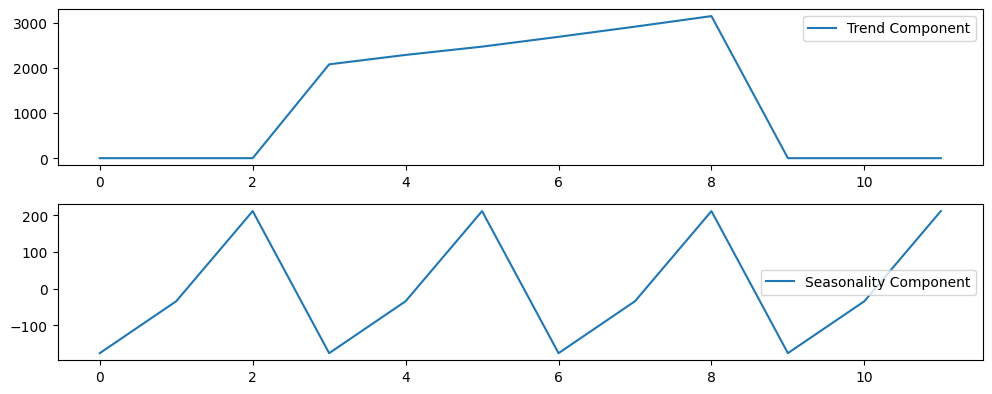

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def moving_average_odd(data, q):

    n = len(data)
    m_t = np.zeros(n)

    values = [item['sales'] for item in data]
    for t in range(q, n - q):
        m_t[t] = np.mean(values[t-q:t+q+1])

    return m_t

def moving_average_even(data, q):

    n = len(data)
    m_t = np.zeros(n)
    d = 2*q

    for t in range(q, n - q):
        m_t[t] = (0.5 * data[t-q]['sales'] + np.sum([item['sales']for item in data[t-q+1:t+q]]) + 0.5 * data[t+q]['sales']) / d

    return m_t

def calculate_w_k(data, trend, d):

    n = len(data)
    w_k = np.zeros(n)

    for k in range(n):
        summation = 0
        count = 0
        for j in range(-(n // d), n // d):
            if 0 <= k + j*d < n:
                summation += data[k + j*d]['sales'] - trend[k + j*d]
                count += 1
        if count > 0:
            w_k[k] = summation / count

    return w_k

def calculate_g_k(w_k, d): #seasonality

    n = len(w_k)
    avg_w = np.mean(w_k)
    g_k = np.zeros(n)

    for k in range(n):
        g_k[k] = w_k[k] - avg_w

    return g_k

data = np.array([
    {"month": "2023-01", "sales": 1500},
    {"month": "2023-02", "sales": 1800},
    {"month": "2023-03", "sales": 2000},
    {"month": "2023-04", "sales": 1700},
    {"month": "2023-05", "sales": 2200},
    {"month": "2023-06", "sales": 2500},
    {"month": "2023-07", "sales": 3000},
    {"month": "2023-08", "sales": 2800},
    {"month": "2023-09", "sales": 3200},
    {"month": "2023-10", "sales": 3100},
    {"month": "2023-11", "sales": 3500},
    {"month": "2023-12", "sales": 4000}
]
)


q = 3

if len(data) % 2 == 1:
    trend = moving_average_odd(data, q)
else:
    trend = moving_average_even(data, q)

w_k = calculate_w_k(data, trend, q)
g_k = calculate_g_k(w_k, q)

print("Trend:", trend)
print("Seasonality:", g_k)


plt.figure(figsize=(10, 6))


plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(g_k, label='Seasonality Component')
plt.legend()

plt.tight_layout()
plt.show()